# imports

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json

In [35]:
path = Path.cwd()/'logs'
path

PosixPath('/Users/davoodwadi/supp/supplementary material/code/WikiText-103/logs')

In [43]:
files = [f for f in path.iterdir()]
files

[PosixPath('/Users/davoodwadi/supp/supplementary material/code/WikiText-103/logs/adamw_1e-07_0.0_SchedulerType.CONSTANT_256_42.json'),
 PosixPath('/Users/davoodwadi/supp/supplementary material/code/WikiText-103/logs/sgd_0.001_0.0_SchedulerType.CONSTANT_128_42.json'),
 PosixPath('/Users/davoodwadi/supp/supplementary material/code/WikiText-103/logs/adamw_0.05_0.0_SchedulerType.CONSTANT_256_42.json'),
 PosixPath('/Users/davoodwadi/supp/supplementary material/code/WikiText-103/logs/adamw_5e-06_0.0_SchedulerType.CONSTANT_128_42.json'),
 PosixPath('/Users/davoodwadi/supp/supplementary material/code/WikiText-103/logs/activesgd_1e-08_0.0_SchedulerType.CONSTANT_128_42.json'),
 PosixPath('/Users/davoodwadi/supp/supplementary material/code/WikiText-103/logs/adamw_5e-05_0.0_SchedulerType.CONSTANT_128_42.json'),
 PosixPath('/Users/davoodwadi/supp/supplementary material/code/WikiText-103/logs/activeadam_1e-07_0.0_SchedulerType.CONSTANT_128_42.json'),
 PosixPath('/Users/davoodwadi/supp/supplementary 

In [44]:
f = files[0]
fname = f.stem
meta = fname.split('_')
meta

['adamw', '1e-07', '0.0', 'SchedulerType.CONSTANT', '256', '42']

For SGDs, we use lr_range = lr_range * 50

In [45]:
lrMin = 1e-7
lrMax = 1e-2

lrMinSGD = lrMin * 50
lrMaxSGD = lrMax * 50
lrMin, lrMax, lrMinSGD, lrMaxSGD

(1e-07, 0.01, 4.9999999999999996e-06, 0.5)

In [46]:
def extract_meta(f):
    fname = f.stem
    meta = fname.split('_')
    optim = meta[0]
    lr = float(meta[1])
    wd = float(meta[2])
    scheduler = ((meta[3]).split('.'))[1]
    bs = int(meta[4])
    seed = int(meta[5])
    try:
        with open(f, 'r') as file:
            data = json.load(file)
    except:
        print(f)
    return optim, lr, wd, scheduler, bs, seed, data

In [47]:
dictt = {
    
    'optim':[],
    'lr':[],
    'wd':[],
    'scheduler':[],
    'bs':[],
    'seed':[],
    'best_ppl':[],
    'best_test':[],
    'train_losses':[],
    'valid_ppls':[],
    'test_ppls':[],
    'epoch_time':[],
    'epochs':[],
    'max_epochs':[],
}
for f in files:
    optim, lr, wd, scheduler, bs, seed, data = extract_meta(f)
    
    if (optim=='sgd' or optim=='activesgd') and (lr>lrMaxSGD or lr<lrMinSGD):
        continue
    if (optim!='sgd' and optim!='activesgd') and (lr>lrMax or lr<lrMin):
        continue
    
    if bs!=128:
        continue
    
    dictt['optim'].append(optim)
    dictt['lr'].append(lr)
    dictt['wd'].append(wd)
    dictt['scheduler'].append(scheduler)
    dictt['bs'].append(bs)
    dictt['seed'].append(seed)
    dictt['valid_ppls'].append(np.array(data.get('valid_ppls')))
    dictt['test_ppls'].append(np.array(data.get('test_ppls')))
    dictt['best_ppl'].append(min(data.get('valid_ppls')))
    dictt['best_test'].append(min(data.get('test_ppls')))
#     dictt['best_ppl'].append(data.get('best_ppl'))
#     dictt['best_test'].append(data.get('best_test'))
    dictt['train_losses'].append(data.get('train_losses'))

    dictt['epoch_time'].append(data.get('epoch_time'))
    dictt['epochs'].append(data.get('epochs'))
    dictt['max_epochs'].append(max(data.get('epochs')))
dictt

{'optim': ['sgd',
  'adamw',
  'adamw',
  'activeadam',
  'sgd',
  'activesgd',
  'adamw',
  'activeadam',
  'activeadam',
  'activesgd',
  'activeadam',
  'adamw',
  'sgd',
  'activesgd',
  'activesgd',
  'sgd',
  'activesgd',
  'activeadam',
  'sgd',
  'adamw',
  'activesgd',
  'sgd',
  'activeadam',
  'activeadam',
  'activesgd',
  'sgd',
  'activesgd',
  'activesgd',
  'adamw',
  'activeadam',
  'sgd',
  'adamw',
  'sgd',
  'activeadam',
  'adamw',
  'adamw',
  'sgd',
  'activeadam',
  'adamw',
  'activeadam',
  'activesgd',
  'adamw'],
 'lr': [0.001,
  5e-06,
  5e-05,
  1e-07,
  0.0001,
  0.001,
  1e-07,
  5e-05,
  5e-06,
  0.05,
  0.0001,
  0.0005,
  0.05,
  5e-06,
  0.0005,
  0.1,
  5e-05,
  0.001,
  5e-06,
  0.001,
  0.1,
  5e-05,
  0.005,
  0.01,
  1e-05,
  0.01,
  0.0001,
  0.01,
  0.0001,
  0.0005,
  1e-05,
  0.005,
  0.0005,
  5e-07,
  1e-05,
  1e-06,
  0.005,
  1e-06,
  0.01,
  1e-05,
  0.005,
  5e-07],
 'wd': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
 

In [48]:
df = pd.DataFrame(dictt)
df.head()

optim            lr   wd scheduler   bs  seed   best_ppl  best_test  \
0         sgd  1.000000e-03  0.0  CONSTANT  128    42   9.591887   9.685040   
1       adamw  5.000000e-06  0.0  CONSTANT  128    42   9.610747   9.766618   
2       adamw  5.000000e-05  0.0  CONSTANT  128    42   8.972414   9.049558   
3  activeadam  1.000000e-07  0.0  CONSTANT  128    42  12.081543  12.432597   
4         sgd  1.000000e-04  0.0  CONSTANT  128    42  14.621952  15.113110   

                                        train_losses  \
0  [4.269722938537598, 3.956637144088745, 3.85395...   
1  [4.694464206695557, 3.7752649784088135, 3.5433...   
2  [3.465231418609619, 2.8220975399017334, 2.6657...   
3  [7.878540992736816, 7.192812919616699, 6.88390...   
4  [4.918905258178711, 4.484518051147461, 4.33334...   

                                          valid_ppls  \
0  [54.04655218646883, 48.06266425673783, 43.1575...   
1  [48.354260899875875, 35.62345416394359, 28.181...   
2  [16.876630935906874, 13.146604736591717, 11.60...   
3  [1455.6265142432208, 1078.4783677709966, 793.7...   
4  [95.93465641451832, 78.15161205490755, 70.0492...   

                                           test_ppls   epoch_time  \
0  [55.49868513572967, 49.24029553175281, 44.1821...  1751.424587   
1  [49.670218164707, 36.43654422372913, 28.914009...  2311.011858   
2  [17.354904736992314, 13.516293756984636, 11.76...  1372.467484   
3  [1480.660949433463, 1097.1541059025099, 807.76...  1837.093704   
4  [100.50242016688107, 81.17283899741643, 72.490...  1724.276411   

                                              epochs  max_epochs  
0  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...         199  
1  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...         199  
2  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...         199  
3  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...         199  
4  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...         199

In [49]:
df['best_epoch'] = df['test_ppls'].apply(np.argmin)
df.drop(columns=['seed', 'scheduler', 'wd', 'valid_ppls', 'epochs'], inplace=True)
df

optim            lr   bs   best_ppl  best_test  \
0          sgd  1.000000e-03  128   9.591887   9.685040   
1        adamw  5.000000e-06  128   9.610747   9.766618   
2        adamw  5.000000e-05  128   8.972414   9.049558   
3   activeadam  1.000000e-07  128  12.081543  12.432597   
4          sgd  1.000000e-04  128  14.621952  15.113110   
5    activesgd  1.000000e-03  128   9.225398   9.315731   
6        adamw  1.000000e-07  128  23.380541  24.066462   
7   activeadam  5.000000e-05  128   8.957360   9.048608   
8   activeadam  5.000000e-06  128   9.265229   9.379311   
9    activesgd  5.000000e-02  128   8.926037   9.006371   
10  activeadam  1.000000e-04  128   8.911445   9.004366   
11       adamw  5.000000e-04  128   8.854298   8.965336   
12         sgd  5.000000e-02  128   8.982137   9.060402   
13   activesgd  5.000000e-06  128  20.593908  21.252873   
14   activesgd  5.000000e-04  128   9.337739   9.443440   
15         sgd  1.000000e-01  128   8.943180   9.059620   
16   activesgd  5.000000e-05  128  10.938683  11.250685   
17  activeadam  1.000000e-03  128   8.877543   8.991912   
18         sgd  5.000000e-06  128  54.486849  55.984719   
19       adamw  1.000000e-03  128   8.902917   9.038584   
20   activesgd  1.000000e-01  128   8.921394   9.016117   
21         sgd  5.000000e-05  128  19.892796  20.538212   
22  activeadam  5.000000e-03  128   8.940955   9.028556   
23  activeadam  1.000000e-02  128   5.033531   5.112112   
24   activesgd  1.000000e-05  128  15.330712  15.858165   
25         sgd  1.000000e-02  128   9.046272   9.124258   
26   activesgd  1.000000e-04  128  10.313113  10.603502   
27   activesgd  1.000000e-02  128   9.003883   9.103111   
28       adamw  1.000000e-04  128   8.903827   8.986494   
29  activeadam  5.000000e-04  128   8.855032   8.958919   
30         sgd  1.000000e-05  128  48.357316  49.568621   
31       adamw  5.000000e-03  128   9.047991   9.168099   
32         sgd  5.000000e-04  128  10.128340  10.271513   
33  activeadam  5.000000e-07  128  10.197208  10.426298   
34       adamw  1.000000e-05  128   9.237818   9.327973   
35       adamw  1.000000e-06  128  11.394546  11.735074   
36         sgd  5.000000e-03  128   9.112907   9.205011   
37  activeadam  1.000000e-06  128   9.660468   9.777825   
38       adamw  1.000000e-02  128   8.742042   8.885791   
39  activeadam  1.000000e-05  128   9.119251   9.211321   
40   activesgd  5.000000e-03  128   9.038248   9.168313   
41       adamw  5.000000e-07  128  13.291245  13.704927   

                                         train_losses  \
0   [4.269722938537598, 3.956637144088745, 3.85395...   
1   [4.694464206695557, 3.7752649784088135, 3.5433...   
2   [3.465231418609619, 2.8220975399017334, 2.6657...   
3   [7.878540992736816, 7.192812919616699, 6.88390...   
4   [4.918905258178711, 4.484518051147461, 4.33334...   
5   [4.269779682159424, 3.956669330596924, 3.85203...   
6   [7.878561496734619, 7.1928277015686035, 6.8948...   
7   [3.4703285694122314, 2.829324960708618, 2.6740...   
8   [4.694350242614746, 3.7752771377563477, 3.5411...   
9   [3.376361608505249, 2.695268154144287, 2.58846...   
10  [3.173931837081909, 2.638587474822998, 2.53734...   
11  [2.760812997817993, 2.4874935150146484, 2.4548...   
12  [3.3851749897003174, 2.6982202529907227, 2.589...   
13  [6.0519304275512695, 5.4067702293396, 5.229373...   
14  [4.445920944213867, 4.077798843383789, 3.98392...   
15  [3.29575252532959, 2.620422840118408, 2.521334...   
16  [5.136885166168213, 4.690678119659424, 4.52879...   
17  [2.777132272720337, 2.5149002075195312, 2.4825...   
18  [6.051914691925049, 5.406764030456543, 5.23482...   
19  [2.7767019271850586, 2.5152275562286377, 2.482...   
20  [3.3028564453125, 2.619443655014038, 2.5211336...   
21  [5.136867523193359, 4.690654754638672, 4.53380...   
22  [2.8309738636016846, 2.4927968978881836, 2.455...   
23  [3.9654674530029297, 3.927675724029541, 3.7984...   
24  [5.73259973526001, 5.176750659942627, 5.00

In [50]:
def find_best_test(row):
    best = float('inf')
    for ppl in row['test_ppls']:
        if ppl<best: 
            best=ppl
        else:
            break
    return best

In [51]:
df['best_test'] = df.apply(find_best_test,axis=1)

min_epochs = df.max_epochs.min()
min_epochs

df['test_ppls'] = df['test_ppls'].apply(lambda x: x[:min_epochs])
df['train_losses'] = df['train_losses'].apply(lambda x: x[:min_epochs])
df['best_test'] = df['test_ppls'].apply(lambda x: min(x))

In [52]:

f={'best_test':'min', 'max_epochs':'max','best_epoch':'max'}

newdf = df.pivot_table(values=['best_test', 'best_epoch', 'max_epochs'], 
                     index = 'optim', 
                     columns='lr', aggfunc=f,
                    )
newdf

best_epoch                                                      \
lr         1.000000e-07 5.000000e-07 1.000000e-06 5.000000e-06 1.000000e-05   
optim                                                                         
activeadam        199.0        199.0        198.0        198.0        198.0   
activesgd           NaN          NaN          NaN        199.0        199.0   
adamw             199.0        199.0        199.0        199.0        198.0   
sgd                 NaN          NaN          NaN        199.0        199.0   

                                                                             \
lr         5.000000e-05 1.000000e-04 5.000000e-04 1.000000e-03 5.000000e-03   
optim                                                                         
activeadam        198.0        198.0        197.0        198.0        185.0   
activesgd         199.0        199.0        195.0        198.0        198.0   
adamw             198.0        197.0        194.0        188.0        188.0   
sgd               199.0        199.0        198.0        198.0        198.0   

            ...   max_epochs                                         \
lr          ... 5.000000e-06 1.000000e-05 5.000000e-05 1.000000e-04   
optim       ...                                                       
activeadam  ...        199.0        199.0        199.0        199.0   
activesgd   ...        199.0        199.0        199.0        199.0   
adamw       ...        199.0        199.0        199.0        199.0   
sgd         ...        199.0        199.0        199.0        199.0   

                                                                             \
lr         5.000000e-04 1.000000e-03 5.000000e-03 1.000000e-02 5.000000e-02   
optim                                                                         
activeadam        199.0        199.0        199.0        199.0          NaN   
activesgd         199.0        199.0        199.0        199.0        199.0   
adamw             199.0        199.0        199.0        199.0          NaN   
sgd               199.0        199.0        199.0        199.0        199.0   

                         
lr         1.000000e-01  
optim                    
activeadam          NaN  
activesgd         199.0  
adamw               NaN  
sgd               199.0  

[4 rows x 39 columns]

In [53]:
newdf.swaplevel(1,0, axis=1).sort_index(axis=1).T

optim                    activeadam   activesgd       adamw         sgd
lr                                                                     
1.000000e-07 best_epoch  199.000000         NaN  199.000000         NaN
             best_test    12.432597         NaN   24.066462         NaN
             max_epochs  199.000000         NaN  199.000000         NaN
5.000000e-07 best_epoch  199.000000         NaN  199.000000         NaN
             best_test    10.426298         NaN   13.704927         NaN
             max_epochs  199.000000         NaN  199.000000         NaN
1.000000e-06 best_epoch  198.000000         NaN  199.000000         NaN
             best_test     9.898441         NaN   11.735074         NaN
             max_epochs  199.000000         NaN  199.000000         NaN
5.000000e-06 best_epoch  198.000000  199.000000  199.000000  199.000000
             best_test     9.662249   21.252873   10.028126   55.984719
             max_epochs  199.000000  199.000000  199.000000  199.000000
1.000000e-05 best_epoch  198.000000  199.000000  198.000000  199.000000
             best_test     9.484506   15.858165    9.682117   49.568621
             max_epochs  199.000000  199.000000  199.000000  199.000000
5.000000e-05 best_epoch  198.000000  199.000000  198.000000  199.000000
             best_test     9.443359   11.250685    9.646077   20.538212
             max_epochs  199.000000  199.000000  199.000000  199.000000
1.000000e-04 best_epoch  198.000000  199.000000  197.000000  199.000000
             best_test     9.445352   10.842456    9.377627   15.113110
             max_epochs  199.000000  199.000000  199.000000  199.000000
5.000000e-04 best_epoch  197.000000  195.000000  194.000000  198.000000
             best_test     9.233555    9.685883    9.349026   10.740501
             max_epochs  199.000000  199.000000  199.000000  199.000000
1.000000e-03 best_epoch  198.000000  198.000000  188.000000  198.000000
             best_test     9.359330    9.882507    9.683830   10.295506
             max_epochs  199.000000  199.000000  199.000000  199.000000
5.000000e-03 best_epoch  185.000000  198.000000  188.000000  198.000000
             best_test     9.499379    9.688698    9.549124    9.731042
             max_epochs  199.000000  199.000000  199.000000  199.000000
1.000000e-02 best_epoch  199.000000  194.000000   21.000000  198.000000
             best_test     8.946772    9.484642   10.000124    9.634185
             max_epochs  199.000000  199.000000  199.000000  199.000000
5.000000e-02 best_epoch         NaN  194.000000         NaN  198.000000
             best_test          NaN    9.425313         NaN    9.493001
             max_epochs         NaN  199.000000         NaN  199.000000
1.000000e-01 best_epoch         NaN  194.000000         NaN  197.000000
             best_test          NaN    9.365377         NaN    9.413017
             max_epochs         NaN  199.000000         NaN  199.000000

# all optims

## best test

In [54]:
pivot = df.pivot_table('best_test', df.optim, df.lr, aggfunc='min')
pivot

lr          1.000000e-07  5.000000e-07  1.000000e-06  5.000000e-06  \
optim                                                                
activeadam     12.432597     10.426298      9.898441      9.662249   
activesgd            NaN           NaN           NaN     21.252873   
adamw          24.066462     13.704927     11.735074     10.028126   
sgd                  NaN           NaN           NaN     55.984719   

lr          1.000000e-05  5.000000e-05  1.000000e-04  5.000000e-04  \
optim                                                                
activeadam      9.484506      9.443359      9.445352      9.233555   
activesgd      15.858165     11.250685     10.842456      9.685883   
adamw           9.682117      9.646077      9.377627      9.349026   
sgd            49.568621     20.538212     15.113110     10.740501   

lr          1.000000e-03  5.000000e-03  1.000000e-02  5.000000e-02  \
optim                                                                
activeadam      9.359330      9.499379      8.946772           NaN   
activesgd       9.882507      9.688698      9.484642      9.425313   
adamw           9.683830      9.549124     10.000124           NaN   
sgd            10.295506      9.731042      9.634185      9.493001   

lr          1.000000e-01  
optim                     
activeadam           NaN  
activesgd       9.365377  
adamw                NaN  
sgd             9.413017

In [55]:
pivot_ = pivot.transpose()
pivot_

pivot_ = pivot_[['activeadam','adamw', 
#                  'activebelief','adabelief',
#                  'activeradam', 'radam',  
                 'activesgd', 'sgd'  
                ]]
pivot_= pivot_.rename(columns={
                       'activeadam':'ActiveAdamW', 
#                        'activebelief': 'ActiveBelief', 
#                        'activeradam': 'ActiveRAdam', 
                       'activesgd': 'ActiveSGD', 
                       'adamw': 'AdamW', 
#                        'adabelief': 'AdaBelief',
#                        'radam': 'RAdam', 
                       'sgd': 'SGD'})
pivot_

optim         ActiveAdamW      AdamW  ActiveSGD        SGD
lr                                                        
1.000000e-07    12.432597  24.066462        NaN        NaN
5.000000e-07    10.426298  13.704927        NaN        NaN
1.000000e-06     9.898441  11.735074        NaN        NaN
5.000000e-06     9.662249  10.028126  21.252873  55.984719
1.000000e-05     9.484506   9.682117  15.858165  49.568621
5.000000e-05     9.443359   9.646077  11.250685  20.538212
1.000000e-04     9.445352   9.377627  10.842456  15.113110
5.000000e-04     9.233555   9.349026   9.685883  10.740501
1.000000e-03     9.359330   9.683830   9.882507  10.295506
5.000000e-03     9.499379   9.549124   9.688698   9.731042
1.000000e-02     8.946772  10.000124   9.484642   9.634185
5.000000e-02          NaN        NaN   9.425313   9.493001
1.000000e-01          NaN        NaN   9.365377   9.413017

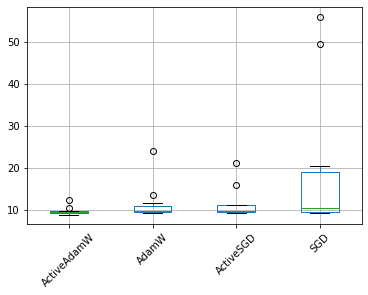

In [56]:
# pivot_ = pivot_.iloc[:-4]
ax = pivot_.boxplot(rot=45)

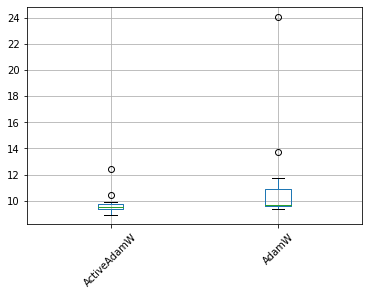

In [57]:
ax1 = pivot_[['ActiveAdamW', 'AdamW']].boxplot(rot=45)

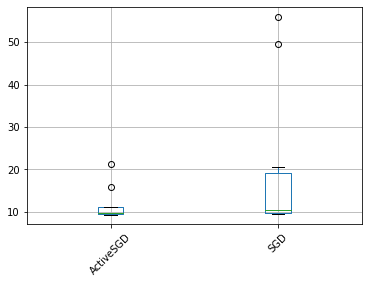

In [58]:
ax2 = pivot_[['ActiveSGD', 'SGD']].iloc[2:].boxplot(rot=45)

In [59]:
fig = ax1.get_figure()

In [60]:
fig.savefig('./wiki103testppladam.png', dpi=300, bbox_inches='tight')

In [61]:
fig = ax2.get_figure()

In [62]:
fig.savefig('./wiki103testpplsgd.png', dpi=300, bbox_inches='tight')

## train loss

In [63]:
def find_best_train(row):
    best = float('inf')
    for ppl in row['train_losses']:
        if ppl<best: 
            best=ppl
        else:
            break
    return best

In [64]:
df['best_train'] = df.apply(find_best_train, axis=1)
df['best_train_ppl'] = df['best_train'].map(lambda x: np.exp(x))
df.head()

optim            lr   bs   best_ppl  best_test  \
0         sgd  1.000000e-03  128   9.591887  10.295506   
1       adamw  5.000000e-06  128   9.610747  10.028126   
2       adamw  5.000000e-05  128   8.972414   9.646077   
3  activeadam  1.000000e-07  128  12.081543  12.432597   
4         sgd  1.000000e-04  128  14.621952  15.113110   

                                        train_losses  \
0  [4.269722938537598, 3.956637144088745, 3.85395...   
1  [4.694464206695557, 3.7752649784088135, 3.5433...   
2  [3.465231418609619, 2.8220975399017334, 2.6657...   
3  [7.878540992736816, 7.192812919616699, 6.88390...   
4  [4.918905258178711, 4.484518051147461, 4.33334...   

                                           test_ppls   epoch_time  max_epochs  \
0  [55.49868513572967, 49.24029553175281, 44.1821...  1751.424587         199   
1  [49.670218164707, 36.43654422372913, 28.914009...  2311.011858         199   
2  [17.354904736992314, 13.516293756984636, 11.76...  1372.467484         199   
3  [1480.660949433463, 1097.1541059025099, 807.76...  1837.093704         199   
4  [100.50242016688107, 81.17283899741643, 72.490...  1724.276411         199   

   best_epoch  best_train  best_train_ppl  
0         198    2.425533       11.308250  
1         199    2.438076       11.450994  
2         198    2.355889       10.547502  
3         199    2.662483       14.331837  
4         199    2.840662       17.127096

In [65]:
pivot = df.pivot_table('best_train_ppl', df.optim, df.lr, aggfunc='min')
pivot

lr          1.000000e-07  5.000000e-07  1.000000e-06  5.000000e-06  \
optim                                                                
activeadam     14.331837     12.073717     11.454347     10.964381   
activesgd            NaN           NaN           NaN     23.707903   
adamw          26.695700     15.566731     13.382423     11.450994   
sgd                  NaN           NaN           NaN     56.119132   

lr          1.000000e-05  5.000000e-05  1.000000e-04  5.000000e-04  \
optim                                                                
activeadam     10.769436     10.535599     10.495638     10.430704   
activesgd      17.902138     12.970161     12.234832     11.023934   
adamw          10.916894     10.547502     10.459681     10.423795   
sgd            49.750609     22.919008     17.127096     12.007590   

lr          1.000000e-03  5.000000e-03  1.000000e-02  5.000000e-02  \
optim                                                                
activeadam     10.447060     10.506492     11.799742           NaN   
activesgd      10.876233     10.711492     10.653941     10.535102   
adamw          10.464443     10.651409     16.219316           NaN   
sgd            11.308250     10.792127     10.701345     10.553049   

lr          1.000000e-01  
optim                     
activeadam           NaN  
activesgd      10.535504  
adamw                NaN  
sgd            10.559633

In [66]:
pivot_ = pivot.transpose()
pivot_

optim         activeadam  activesgd      adamw        sgd
lr                                                       
1.000000e-07   14.331837        NaN  26.695700        NaN
5.000000e-07   12.073717        NaN  15.566731        NaN
1.000000e-06   11.454347        NaN  13.382423        NaN
5.000000e-06   10.964381  23.707903  11.450994  56.119132
1.000000e-05   10.769436  17.902138  10.916894  49.750609
5.000000e-05   10.535599  12.970161  10.547502  22.919008
1.000000e-04   10.495638  12.234832  10.459681  17.127096
5.000000e-04   10.430704  11.023934  10.423795  12.007590
1.000000e-03   10.447060  10.876233  10.464443  11.308250
5.000000e-03   10.506492  10.711492  10.651409  10.792127
1.000000e-02   11.799742  10.653941  16.219316  10.701345
5.000000e-02         NaN  10.535102        NaN  10.553049
1.000000e-01         NaN  10.535504        NaN  10.559633

In [67]:
pivot_ = pivot_[['activeadam', 'activesgd', 'adamw', 'sgd']]
pivot_= pivot_.rename(columns={
                       'activeadam':'ActiveAdamW', 
#                        'activebelief': 'ActiveBelief', 
#                        'activeradam': 'ActiveRAdam', 
                       'activesgd': 'ActiveSGD', 
                       'adamw': 'AdamW', 
#                        'adabelief': 'AdaBelief',
#                        'radam': 'RAdam', 
                       'sgd': 'SGD'})
pivot_

optim         ActiveAdamW  ActiveSGD      AdamW        SGD
lr                                                        
1.000000e-07    14.331837        NaN  26.695700        NaN
5.000000e-07    12.073717        NaN  15.566731        NaN
1.000000e-06    11.454347        NaN  13.382423        NaN
5.000000e-06    10.964381  23.707903  11.450994  56.119132
1.000000e-05    10.769436  17.902138  10.916894  49.750609
5.000000e-05    10.535599  12.970161  10.547502  22.919008
1.000000e-04    10.495638  12.234832  10.459681  17.127096
5.000000e-04    10.430704  11.023934  10.423795  12.007590
1.000000e-03    10.447060  10.876233  10.464443  11.308250
5.000000e-03    10.506492  10.711492  10.651409  10.792127
1.000000e-02    11.799742  10.653941  16.219316  10.701345
5.000000e-02          NaN  10.535102        NaN  10.553049
1.000000e-01          NaN  10.535504        NaN  10.559633

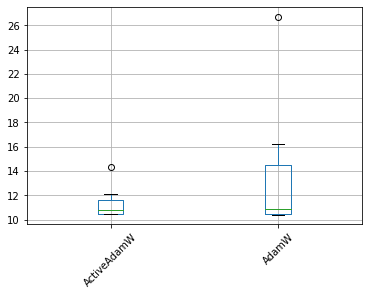

In [68]:
ax1 = pivot_[['ActiveAdamW', 'AdamW']].boxplot(rot=45)

In [69]:
fig = ax1.get_figure()

In [70]:
fig.savefig('./wiki103trainppladam.png', dpi=300, bbox_inches='tight')

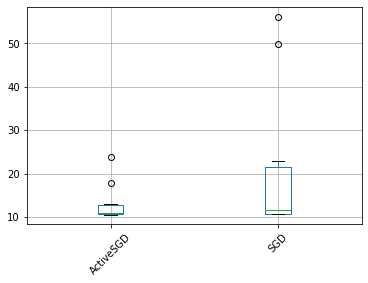

In [71]:
ax2 = pivot_[['ActiveSGD', 'SGD']].boxplot(rot=45)

In [72]:
fig = ax2.get_figure()

In [73]:
fig.savefig('./wiki103trainpplsgd.png', dpi=300, bbox_inches='tight')